In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
import scipy.stats as stats

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [6]:
df = pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
191,233.8,0.0,94.6,197.9,4.6,947.0,852.2,28,22.84
929,135.0,105.0,193.0,196.0,6.0,965.0,643.0,28,21.91
81,318.8,212.5,0.0,155.7,14.3,852.1,880.4,3,25.20
53,304.0,76.0,0.0,228.0,0.0,932.0,670.0,90,49.19
36,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [10]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_predict = model.predict(x_test)

In [17]:
r2_score(y_test, y_predict)

0.6275531792314848

In [18]:
np.mean(cross_val_score(model,x,y,scoring='r2'))

0.46099404916628683

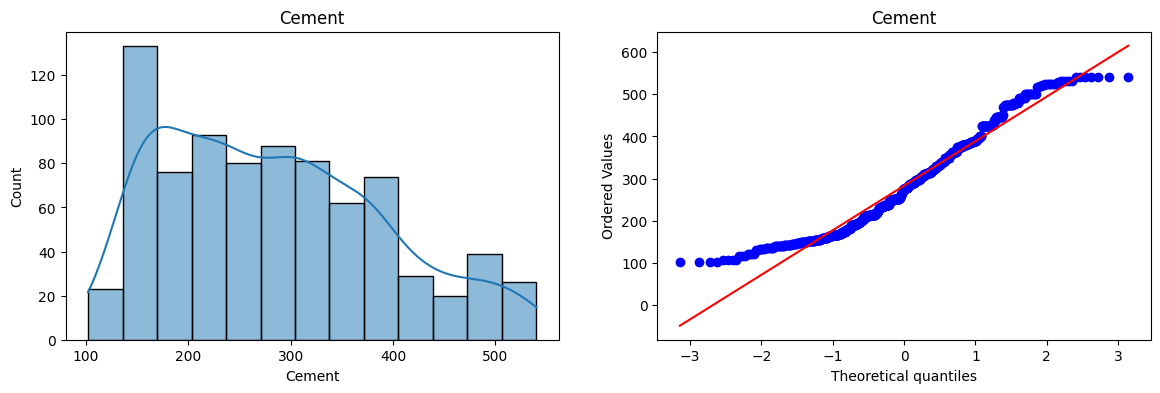

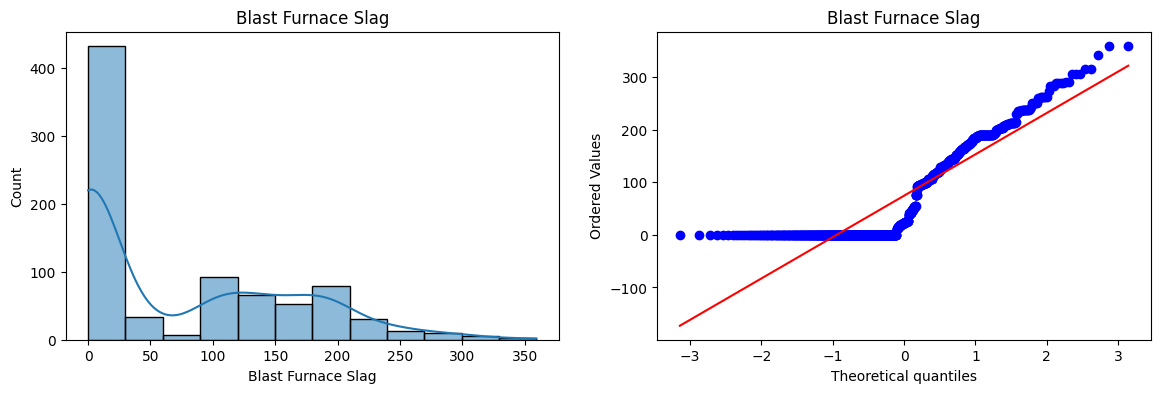

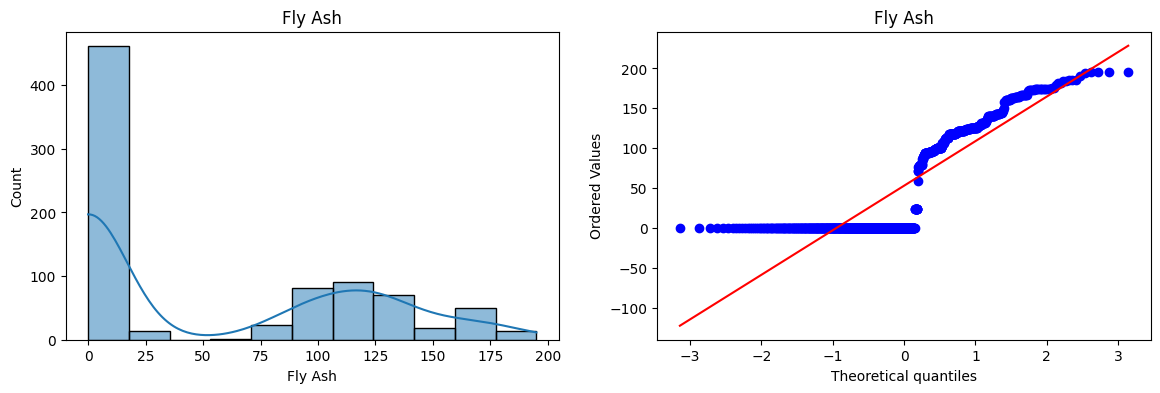

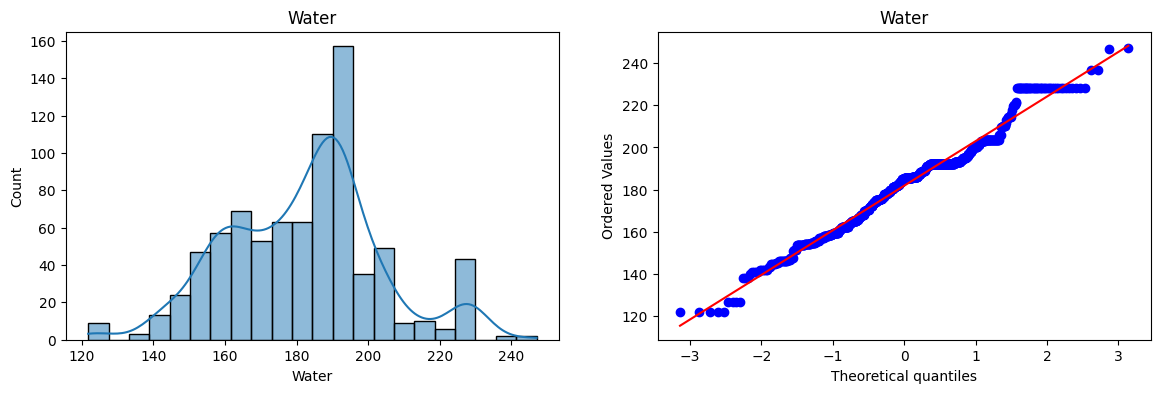

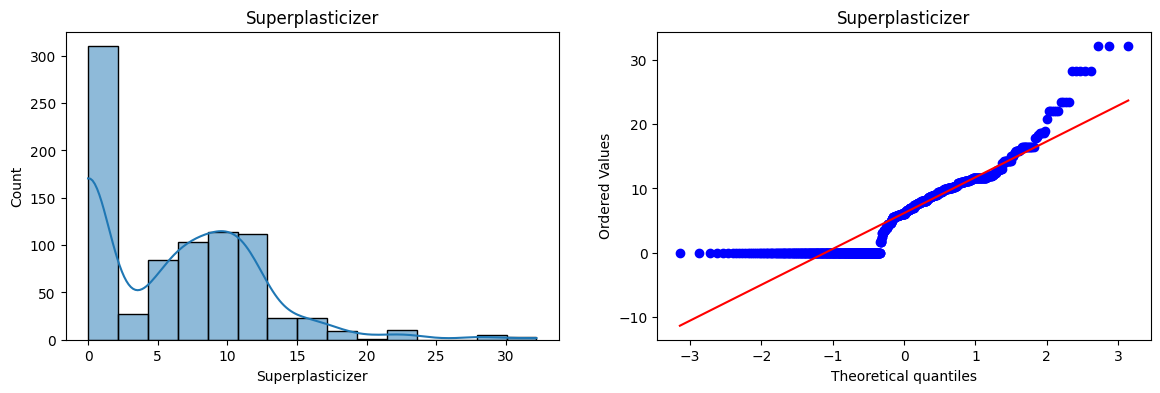

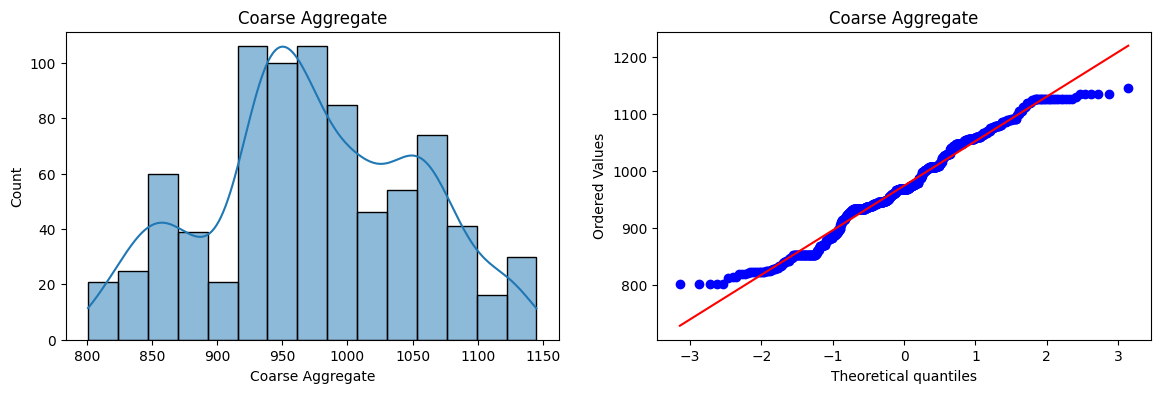

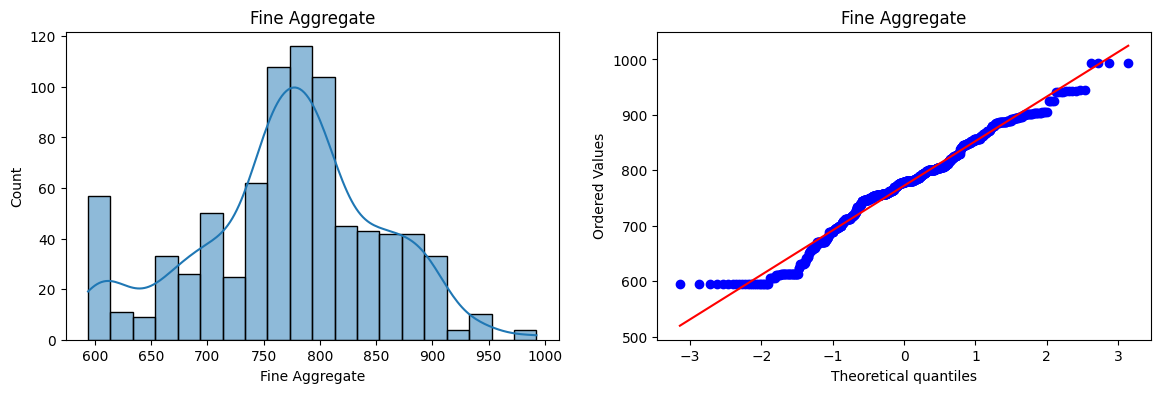

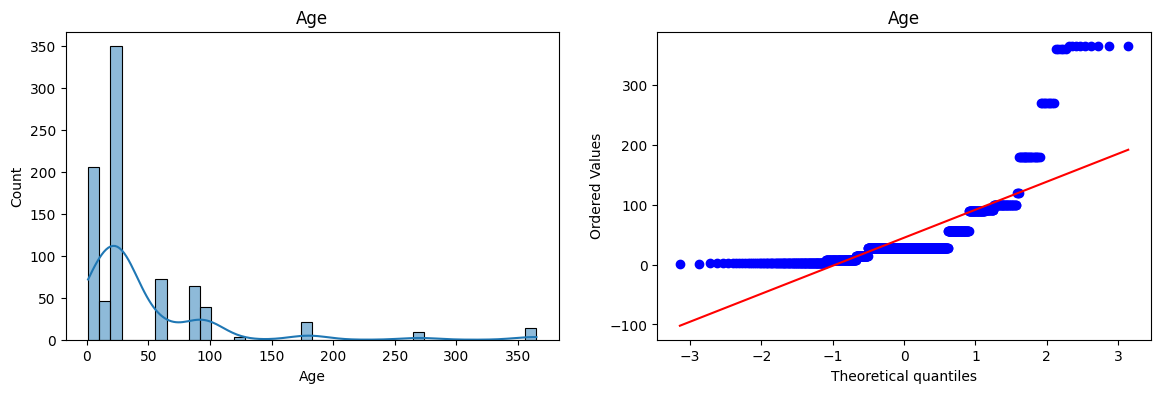

In [28]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sn.histplot(x_train[col], kde = True)
    plt.title(col)

   
    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot = plt)
    plt.title(col)
    plt.show()


In [29]:
pt = PowerTransformer(method='box-cox')

In [34]:
x_train_transform = pt.fit_transform(x_train+0.00001)
x_test_transform = pt.transform(x_test+0.00001)

In [42]:
pd.DataFrame({'cols': x_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [43]:
model2 = LinearRegression()

In [44]:
model2.fit(x_train_transform, y_train)

LinearRegression()

In [45]:
prediction2 = model2.predict(x_test_transform)

In [46]:
r2_score(y_test, prediction2)

0.805459936672992

In [47]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

0.6658537927966963

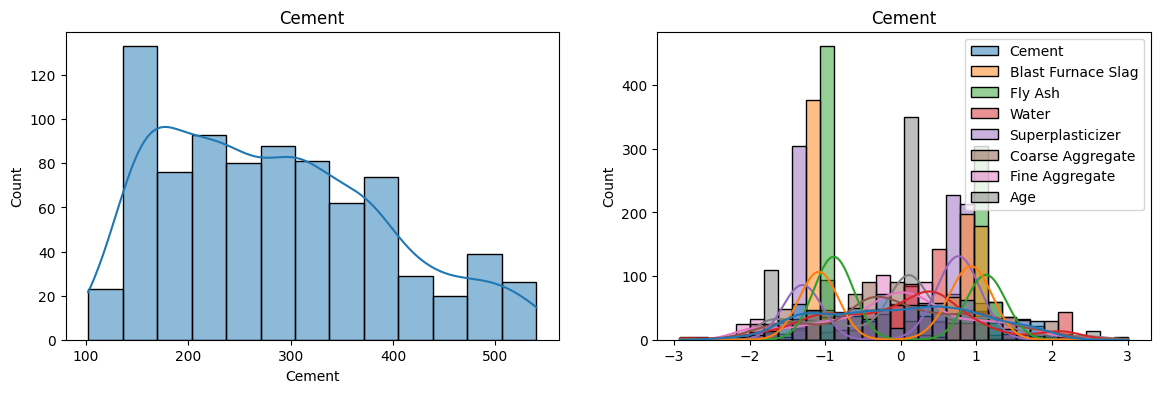

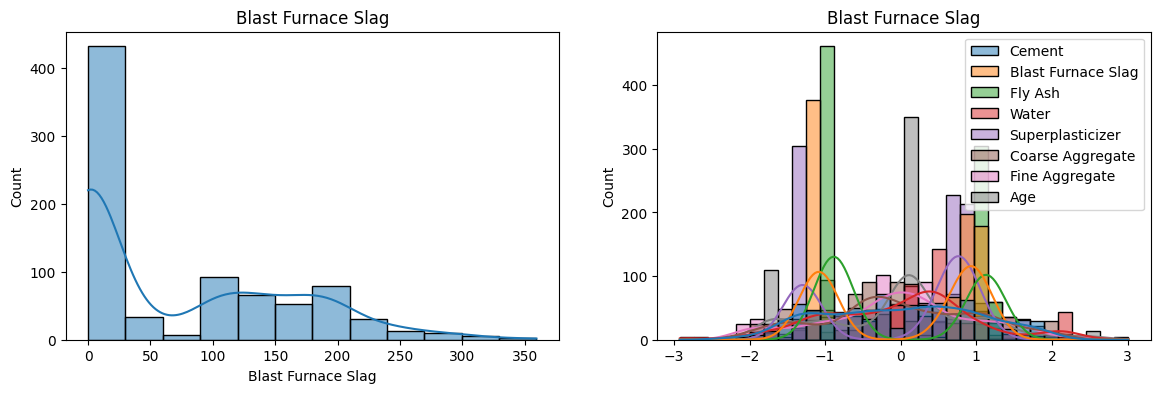

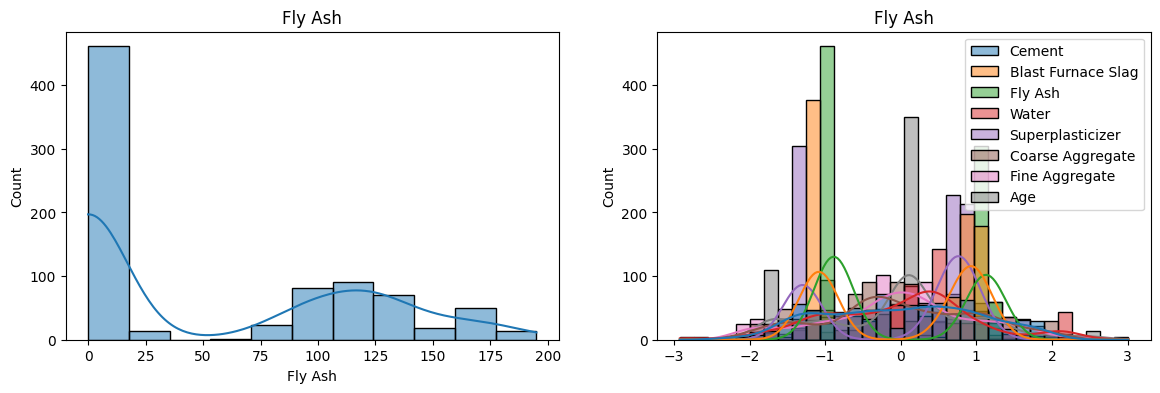

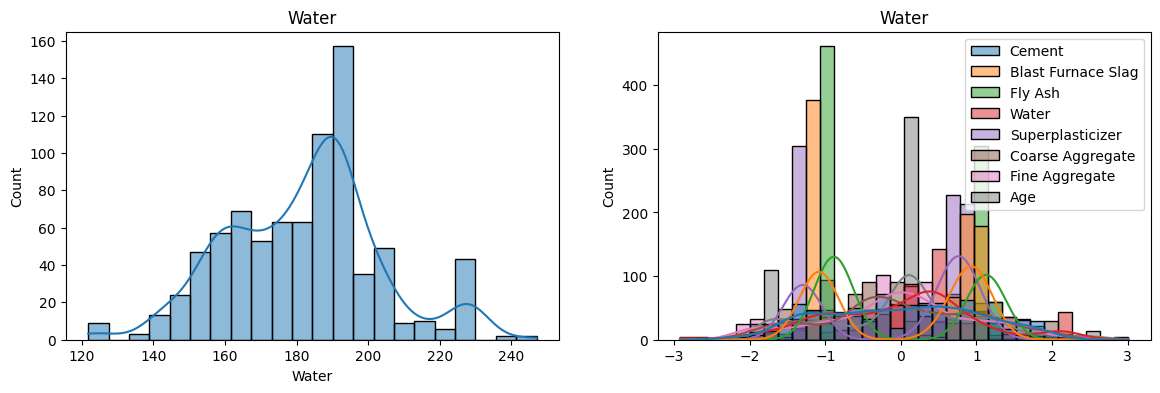

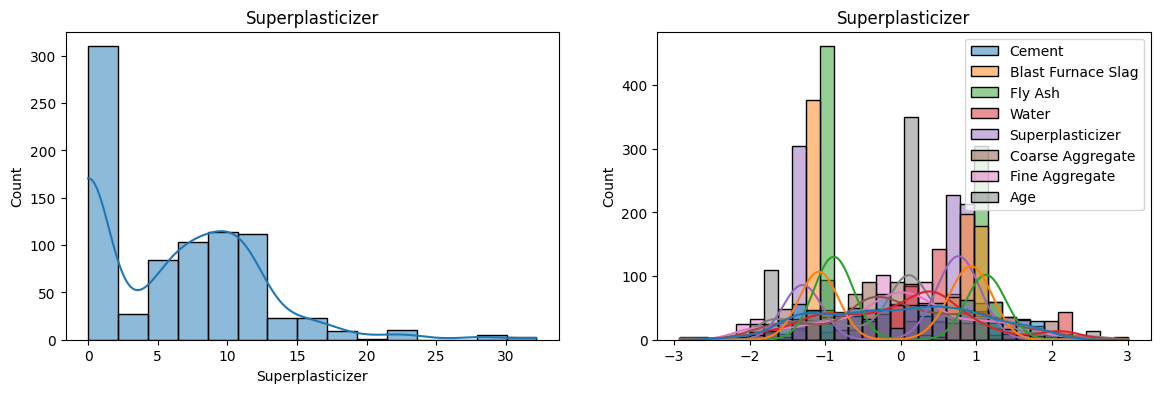

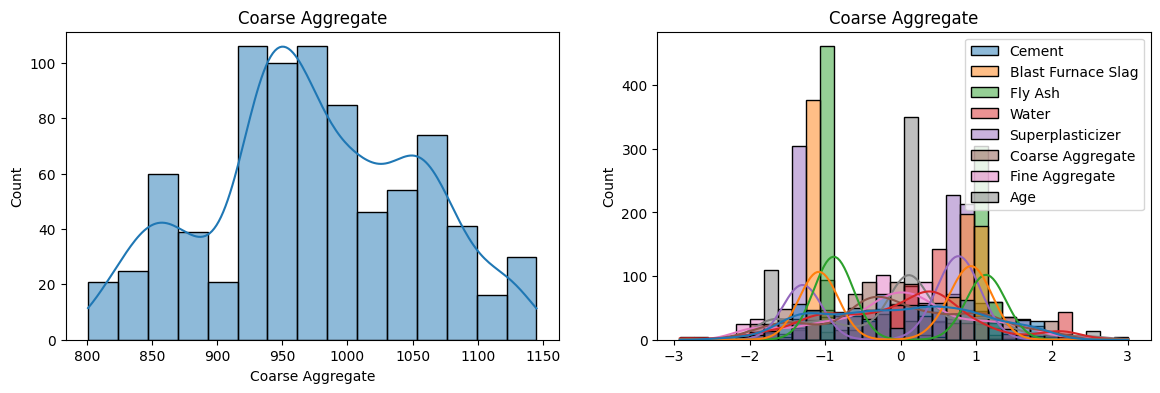

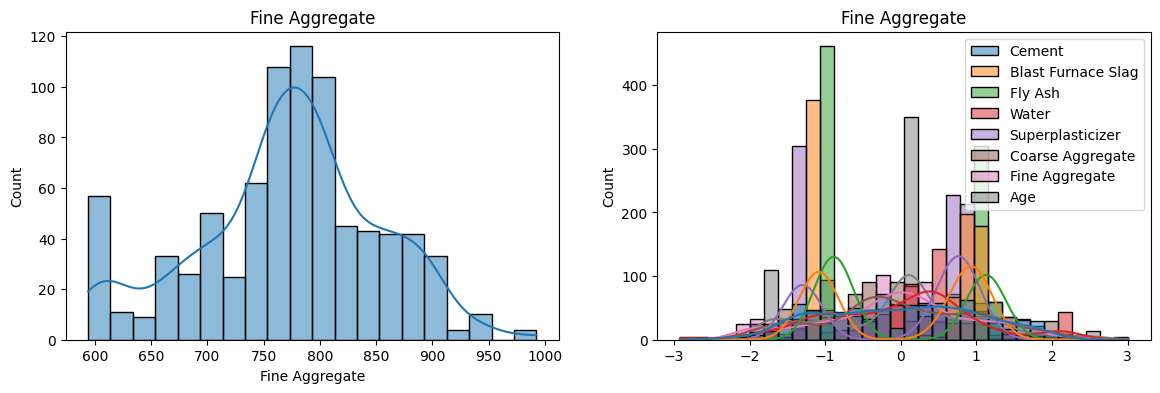

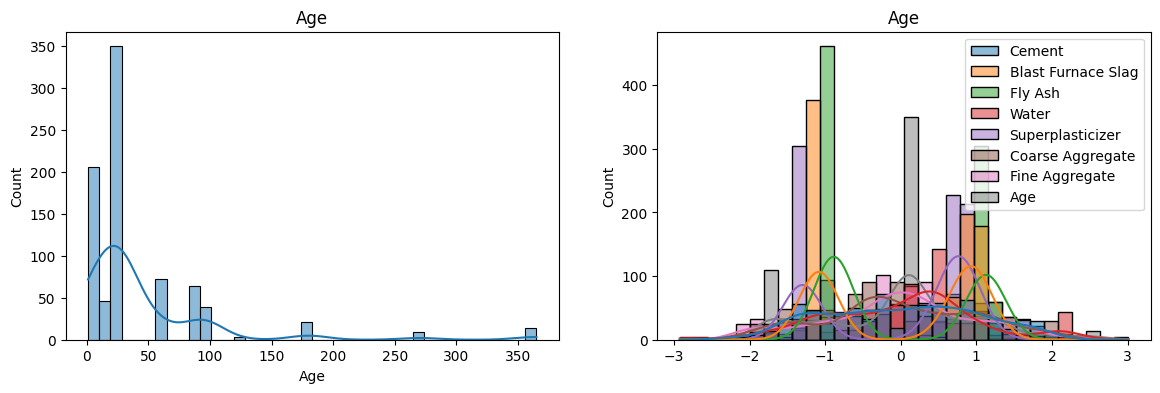

In [51]:
x_train_transformed = pd.DataFrame(x_train_transform,columns=x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sn.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sn.histplot(x_train_transformed, kde=True)
    plt.title(col)

    plt.show()

In [52]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(x_train)
X_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513339307


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [54]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285742

In [56]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=x_train.columns)

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


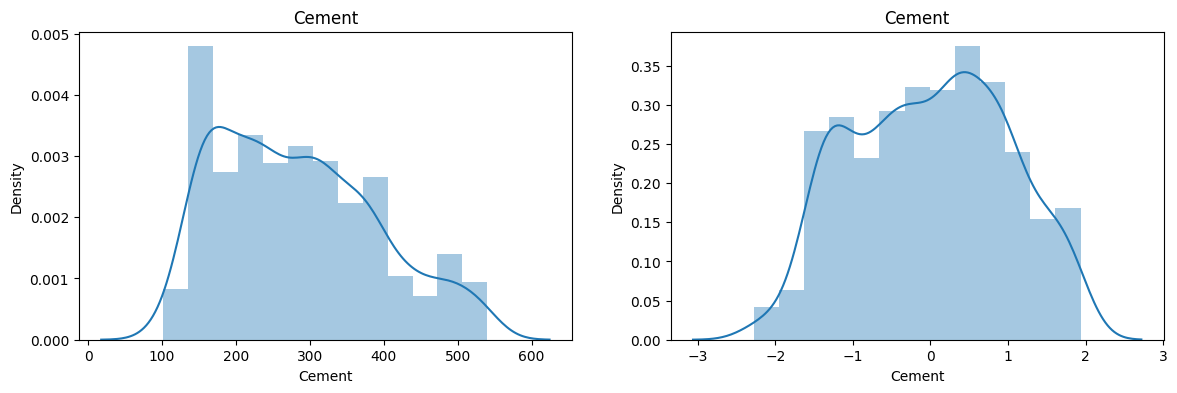

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


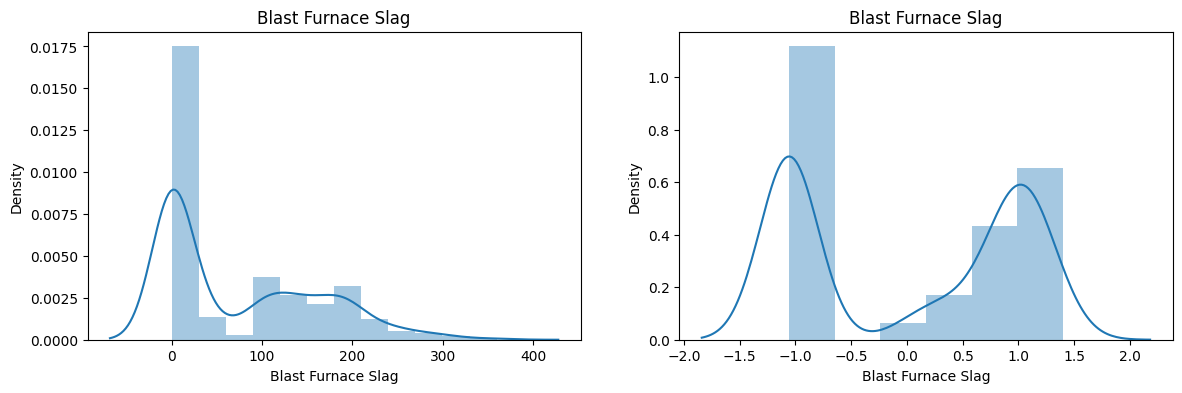

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


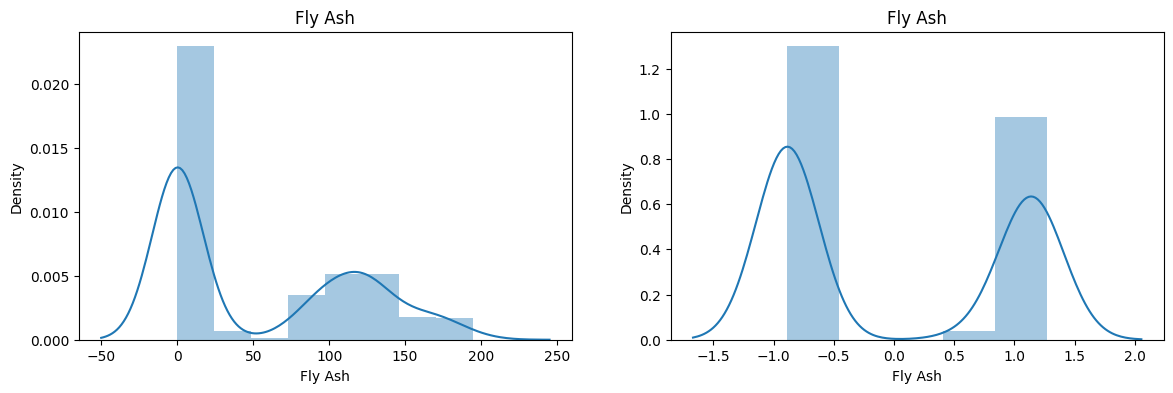

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


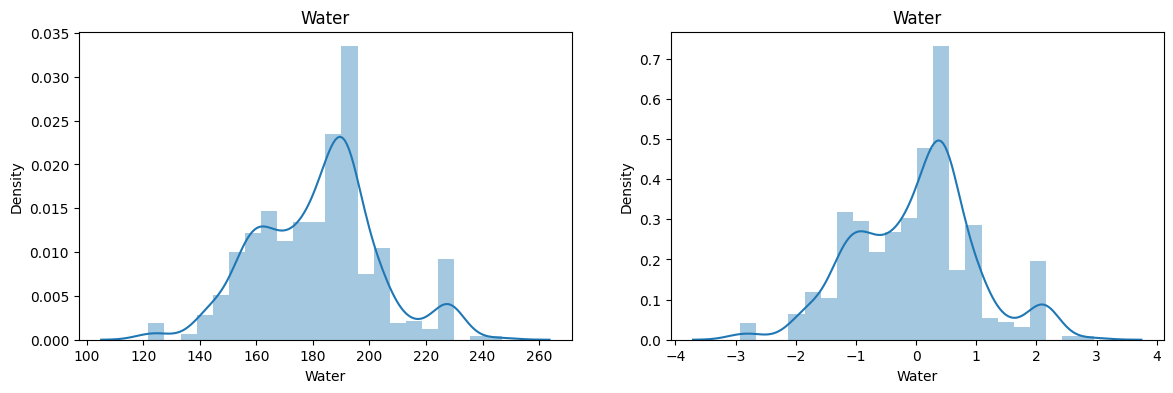

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


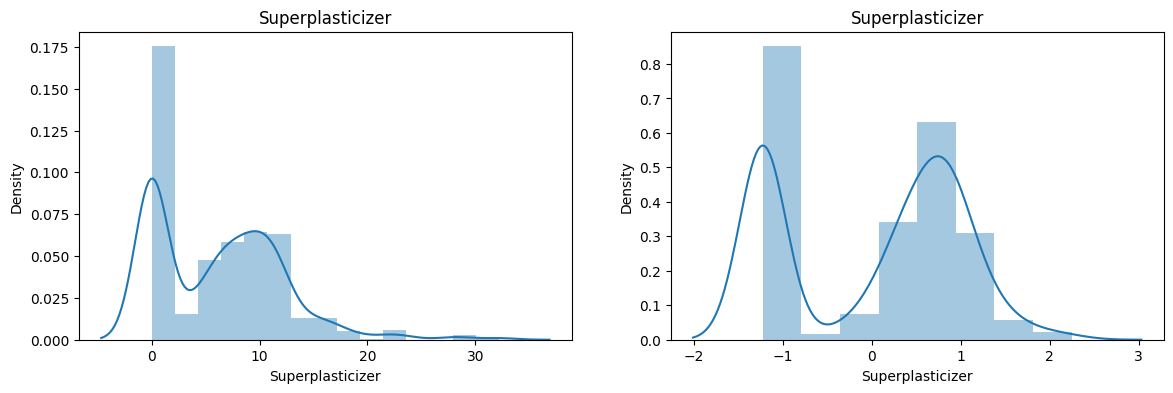

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


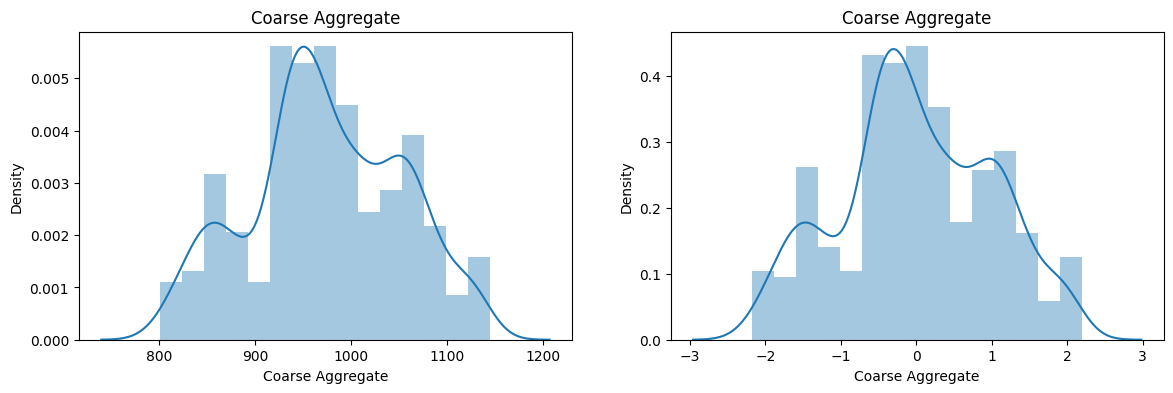

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


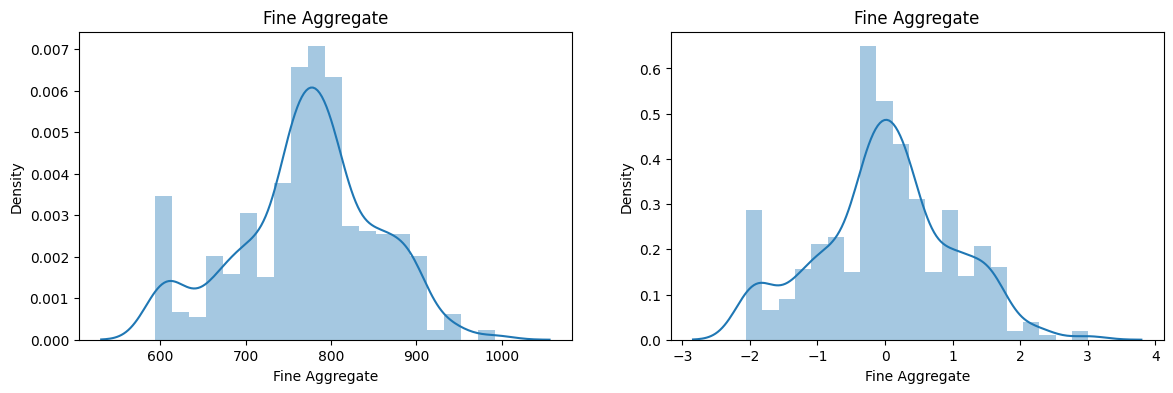

C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x_train[col])
C:\Users\shoab\AppData\Local\Temp\ipykernel_2676\3423514611.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(X_train_transformed2[col])


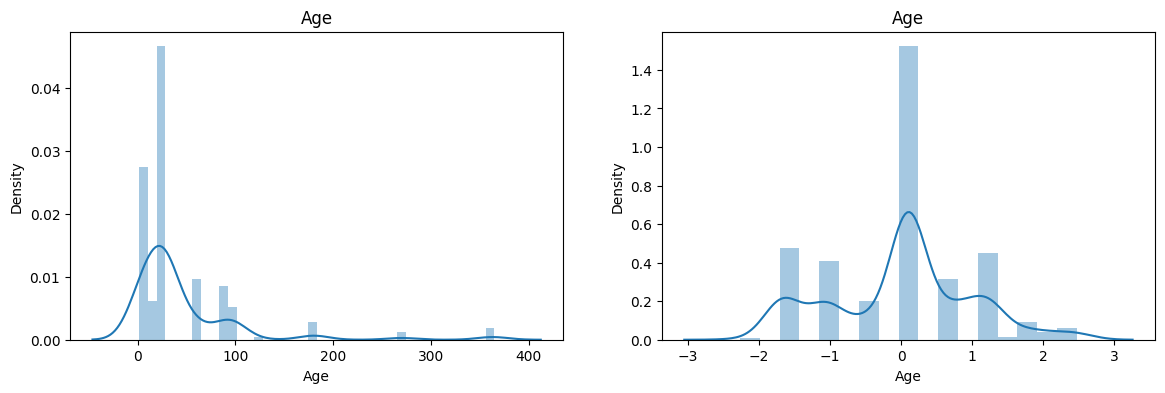

In [57]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sn.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    sn.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [65]:
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
